In [182]:
import pandas as pd

pd.set_option('display.max_rows', 5)
tabla = pd.read_html('https://sede.agenciatributaria.gob.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/irpfmunicipios/2020/jrubikf7024f7e68a6d19091b823f761818f14de77d7950.html')
df = tabla[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 8 columns):
Unnamed: 0                                         3013 non-null object
Titulares                                          3013 non-null object
NUMERODECLARACIONES                                3013 non-null object
NUMEROHABITANTES                                   3010 non-null object
POSICIONAMIENTORENTA BRUTA MEDIANIVELNACIONAL      2947 non-null object
POSICIONAMIENTORENTA BRUTA MEDIANIVELAUTONÓMICO    2947 non-null object
RENTA BRUTA MEDIA                                  3013 non-null float64
RENTA DISPONIBLEMEDIA                              3013 non-null float64
dtypes: float64(2), object(6)
memory usage: 188.4+ KB


In [183]:
df

,Unnamed: 0,Titulares,NUMERODECLARACIONES,NUMEROHABITANTES,POSICIONAMIENTORENTA BRUTA MEDIANIVELNACIONAL,POSICIONAMIENTORENTA BRUTA MEDIANIVELAUTONÓMICO,RENTA BRUTA MEDIA,RENTA DISPONIBLEMEDIA
0,Total,24.430.537,21.638.795,44.511.645,NaN,NaN,27.776,22.706
1,Andalucía,4.428.164,3.797.932,8.472.407,NaN,NaN,23.108,19.343
...,...,...,...,...,...,...,...,...
3011,No residentes,2.859,2.566,NaN,-,-,29.424,25.401
3012,No residentes,2.859,2.566,NaN,-,-,29.424,25.401


In [184]:
# Nombramos la primera columna como 'Municipios'
df.rename(columns={'Unnamed: 0': 'Municipios'}, inplace=True)
df

,Municipios,Titulares,NUMERODECLARACIONES,NUMEROHABITANTES,POSICIONAMIENTORENTA BRUTA MEDIANIVELNACIONAL,POSICIONAMIENTORENTA BRUTA MEDIANIVELAUTONÓMICO,RENTA BRUTA MEDIA,RENTA DISPONIBLEMEDIA
0,Total,24.430.537,21.638.795,44.511.645,NaN,NaN,27.776,22.706
1,Andalucía,4.428.164,3.797.932,8.472.407,NaN,NaN,23.108,19.343
...,...,...,...,...,...,...,...,...
3011,No residentes,2.859,2.566,NaN,-,-,29.424,25.401
3012,No residentes,2.859,2.566,NaN,-,-,29.424,25.401


In [185]:
# Buscar los municipios de la provincia de Santa Cruz de Tenerife
# Todos contienen la cadena '-38'
df_38 = df[df.Municipios.str.contains('-38', regex= True, na=False)]
df_38

,Municipios,Titulares,NUMERODECLARACIONES,NUMEROHABITANTES,POSICIONAMIENTORENTA BRUTA MEDIANIVELNACIONAL,POSICIONAMIENTORENTA BRUTA MEDIANIVELAUTONÓMICO,RENTA BRUTA MEDIA,RENTA DISPONIBLEMEDIA
857,"Rosario, El-38032",9.070,8.298,17.590,155,2,31.849,25.484
858,Santa Cruz de Tenerife-38038,107.637,97.856,208.563,449,4,27.783,22.799
...,...,...,...,...,...,...,...,...
909,"Tanque, El-38044",1.248,1.095,2.829,2.598,86,16.372,14.590
910,Garafía-38016,555,507,1.813,2.734,87,15.466,13.689


In [186]:
# Los municipios también se podrían buscar con un 'loc' sobre el índice, ya que son consecutivos
df.loc[857:910]

,Municipios,Titulares,NUMERODECLARACIONES,NUMEROHABITANTES,POSICIONAMIENTORENTA BRUTA MEDIANIVELNACIONAL,POSICIONAMIENTORENTA BRUTA MEDIANIVELAUTONÓMICO,RENTA BRUTA MEDIA,RENTA DISPONIBLEMEDIA
857,"Rosario, El-38032",9.070,8.298,17.590,155,2,31.849,25.484
858,Santa Cruz de Tenerife-38038,107.637,97.856,208.563,449,4,27.783,22.799
...,...,...,...,...,...,...,...,...
909,"Tanque, El-38044",1.248,1.095,2.829,2.598,86,16.372,14.590
910,Garafía-38016,555,507,1.813,2.734,87,15.466,13.689


In [187]:
# Municipios a index
df_38.set_index(['Municipios'] , inplace= True)

In [188]:
# Sacar dos columnas para el gráfico
df_38_rentas = df_38[['RENTA BRUTA MEDIA', 'RENTA DISPONIBLEMEDIA']].copy()
df_38_rentas

,RENTA BRUTA MEDIA,RENTA DISPONIBLEMEDIA
Municipios,,
"Rosario, El-38032",31.849,25.484
Santa Cruz de Tenerife-38038,27.783,22.799
...,...,...
"Tanque, El-38044",16.372,14.590
Garafía-38016,15.466,13.689


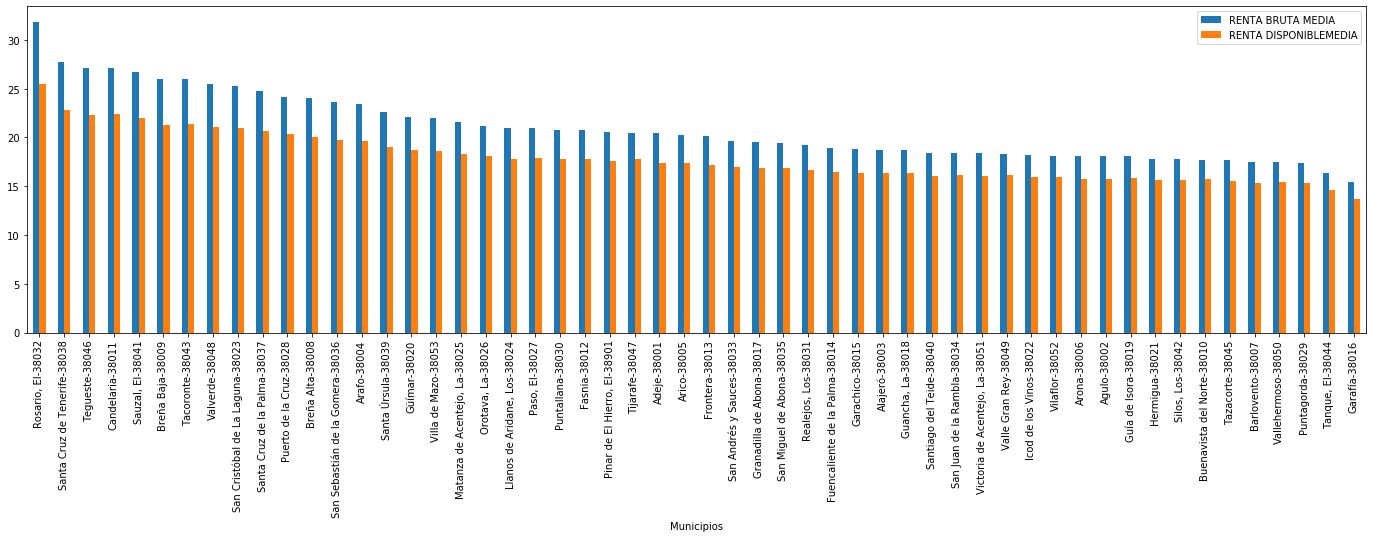

In [189]:
# La diferencia son los impuestos, o sea, el rabito azul
ax = df_38_rentas.plot.bar(figsize=(24,6))

In [190]:
#### ¿Cuáles son los porcentajes medios por municipios del impuesto (Presión fiscal)?

df_38_rentas['Diferencia'] = df_38_rentas.apply(lambda row: row['RENTA BRUTA MEDIA'] - row['RENTA DISPONIBLEMEDIA'], axis=1)
df_38_rentas['Porcentaje'] = df_38_rentas.apply(lambda row: row['Diferencia'] / row['RENTA BRUTA MEDIA'] * 100, axis=1)


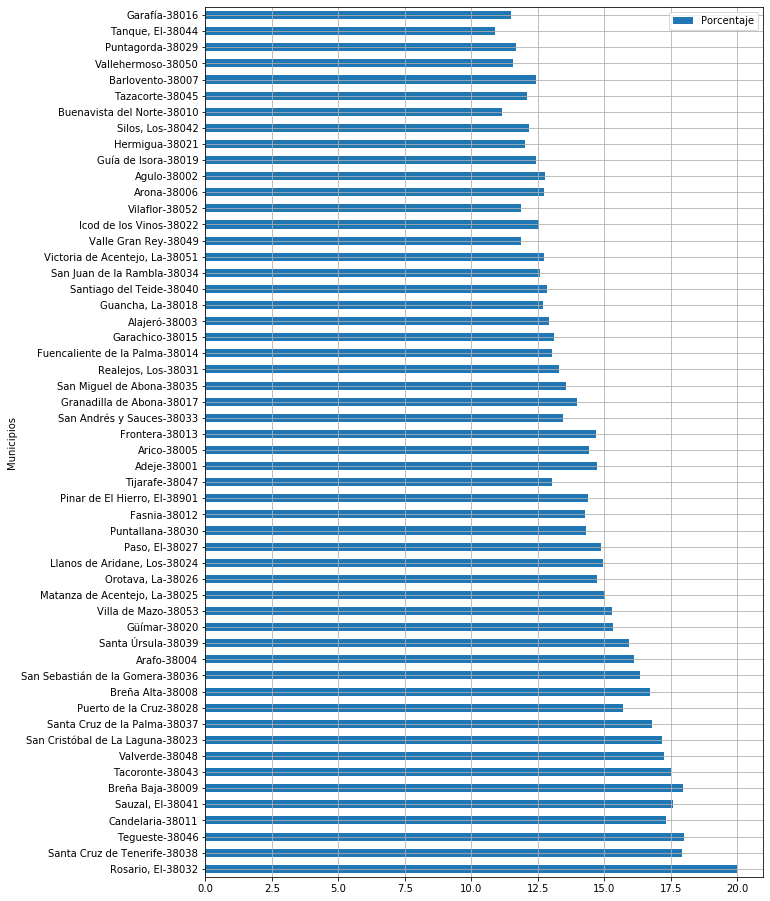

In [191]:
from matplotlib.pyplot import grid
ax = df_38_rentas.plot.barh(y='Porcentaje', rot=0, figsize=(10,16), grid=True)

Text(0.5, 0, 'Renta bruta media en miles de euros')

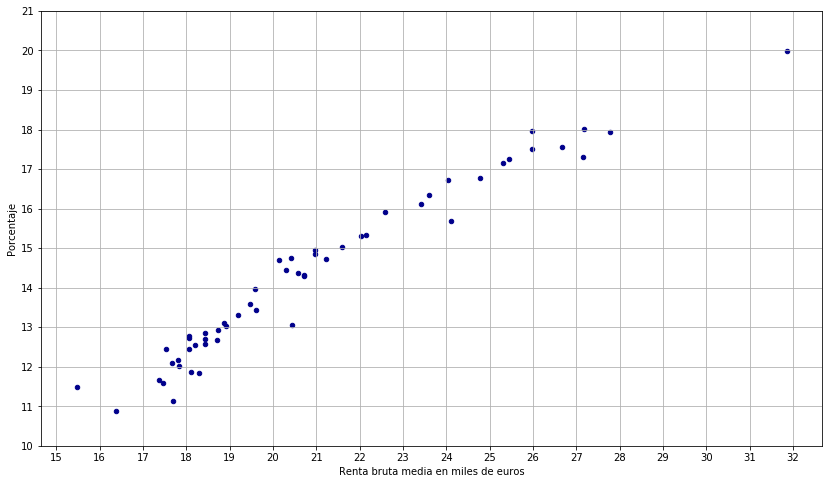

In [192]:
# la progresividad del impuesto vista desde la renta bruta media por municipio
# o dónde intentan engañar a Hacienda con más intensidad

from matplotlib.pyplot import xlabel

ax1 = df_38_rentas.plot.scatter(x='RENTA BRUTA MEDIA',
                      y='Porcentaje',
                      c='DarkBlue',
                      figsize=(14,8),
                      grid=True,
                      xticks = range(15,33,1),
                      yticks = range(10,22,1)
                       
                      )
xlabel('Renta bruta media en miles de euros')                  

In [193]:
pd.set_option('display.max_rows', 8885)
df_38_rentas[['RENTA BRUTA MEDIA', 'Porcentaje']]

,RENTA BRUTA MEDIA,Porcentaje
Municipios,,
"Rosario, El-38032",31.849,19.984929
Santa Cruz de Tenerife-38038,27.783,17.939027
Tegueste-38046,27.169,18.013177
Candelaria-38011,27.146,17.317469
"Sauzal, El-38041",26.679,17.564376
Breña Baja-38009,25.981,17.974674
Tacoronte-38043,25.976,17.504620
Valverde-38048,25.447,17.259402
San Cristóbal de La Laguna-38023,25.309,17.152001


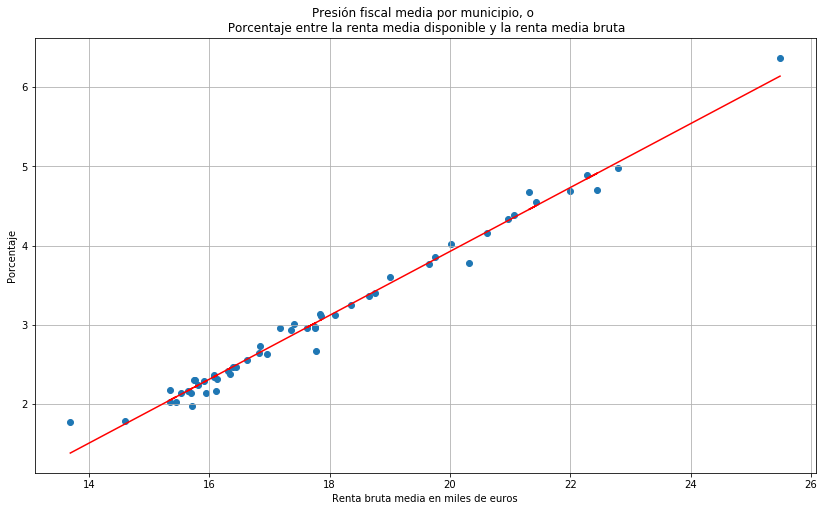

In [197]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df_38_rentas.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df_38_rentas.iloc[:, 2].values.reshape(-1, 1)  # df.iloc[:, 2] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

fig = plt.figure(figsize=(14,8))
plt.title("Presión fiscal media por municipio, o \n Porcentaje entre la renta media disponible y la renta media bruta")
plt.xlabel("Renta bruta media en miles de euros")
plt.ylabel("Porcentaje")
plt.grid()
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Afinando el entramado

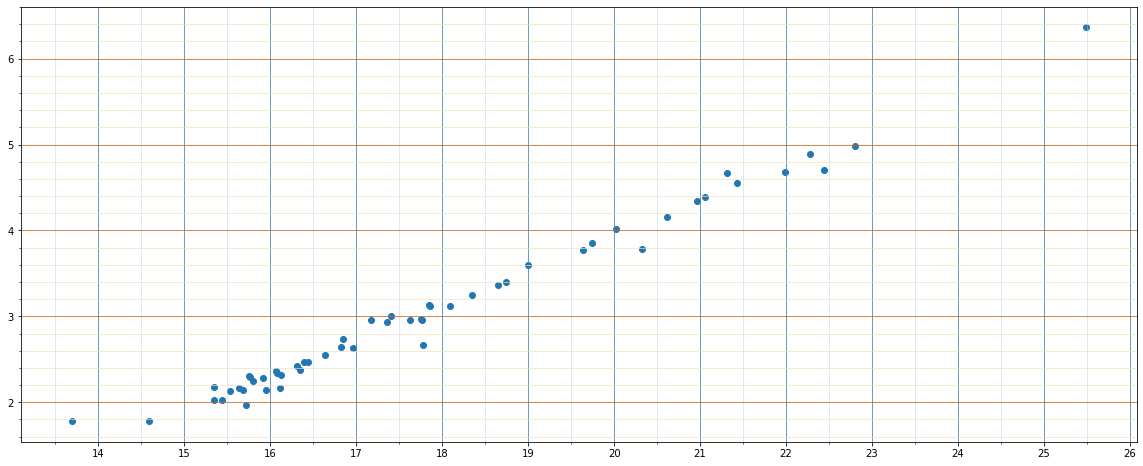

In [203]:
from matplotlib.ticker import MultipleLocator

fig,ax = plt.subplots(figsize=(20, 8))
ax.scatter(X, Y)

# Eje x
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(.5))

#Eje y
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(.2))

ax.grid(which= "major", axis = "x", color = "SteelBlue")
ax.grid(which = "minor", axis = "x", color = "LightSteelBlue", alpha = 0.5)

ax.grid(which= "major", axis = "y", color = "Chocolate")
ax.grid(which = "minor", axis = "y", color = "Wheat", alpha = 0.8)

plt.show()